In [80]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, RationalQuadratic, Matern
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 200

seed = 1
np.random.seed(seed)

In [86]:
# Create synthetic data assuming the following values for theta
X_test = np.linspace(-2,2,1000).reshape(-1,1)
Y_test = (1*X_test -1*X_test**2 + X_test**3).reshape(-1,1)

X_train = np.linspace(-2,2,5).reshape(-1,1)
Y = (1*X_train -1*X_train**2 + X_train**3).reshape(-1,1)
noise = np.random.normal(size=Y.shape, loc = 0, scale = 1)
Y_train = Y + noise
print(Y_train)

kernel = 1*Matern(nu = 5/2) + WhiteKernel()
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100)

fit_gp_model = gp_model.fit(X_train, Y_train)
Y_gp, stdev_gp = fit_gp_model.predict(X_test, return_std=True)
print(fit_gp_model.kernel_)

[[-1.50998913e+01]
 [-3.67124613e+00]
 [-1.26645989e-02]
 [-1.17310349e-01]
 [ 6.23441570e+00]]
9.95**2 * Matern(length_scale=1.6, nu=2.5) + WhiteKernel(noise_level=1e-05)


/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


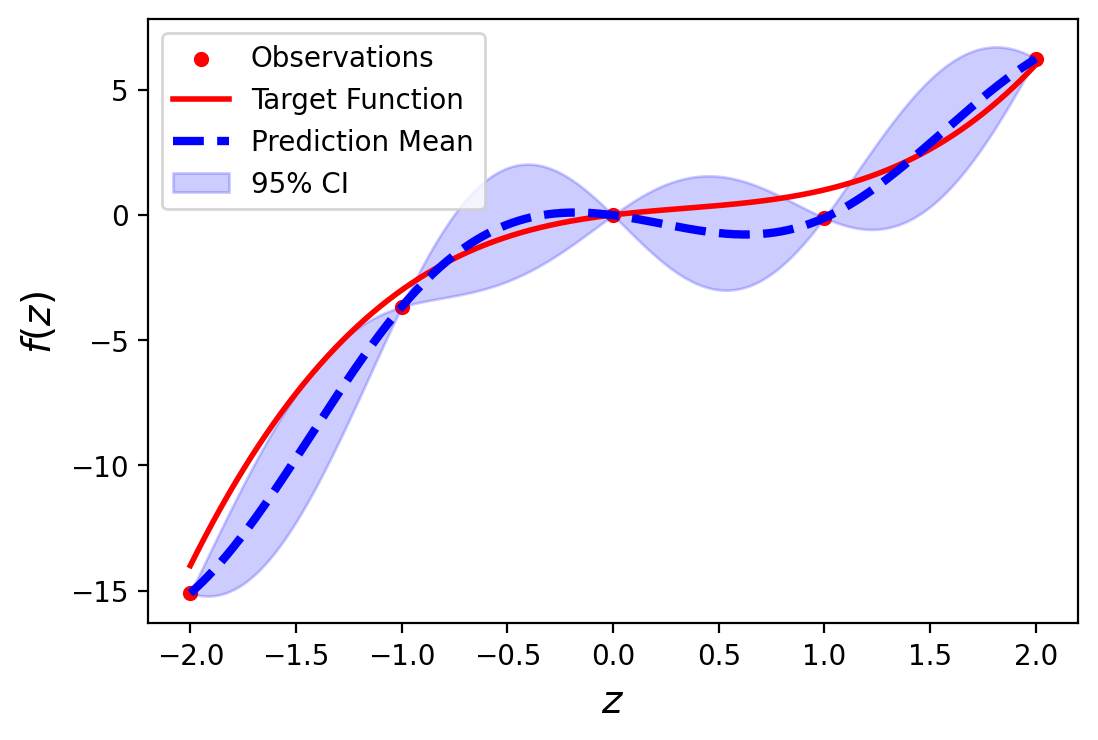

In [87]:
# Compare the experiments to the true model
plt.scatter(X_train,Y_train, color = "r", s=20,label="Observations")
plt.plot(X_test,Y_test,'r-',linewidth=2,label="Target Function")
plt.plot(X_test,Y_gp,'b',linestyle = "--", linewidth = 3, label="Prediction Mean")
plt.fill_between(X_test.flatten(), Y_gp-1.96*stdev_gp, Y_gp+1.96*stdev_gp, alpha=0.2, color = "b", label = "95% CI")
plt.xlabel(r"$z$",fontsize=14)
plt.ylabel(r'$f(z)$',fontsize=14)
plt.legend()
plt.show()